In [1]:
from asgardpy.analysis import AsgardpyAnalysis
from asgardpy.config import AsgardpyConfig
from asgardpy.utils.plot import (
    plot_parameter_stat_profile,
    plot_spectrum_fp,
    plot_spectrum_model
)
from gammapy.modeling.models import Models, create_crab_spectral_model
import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u

In [2]:
base_dir = "/fefs/aswg/workspace/chaitanya.priyadarshi/"
config_file = base_dir + "analyze_pg1553_full.yaml"
output_dir = base_dir + "real_data/AGN/PG1553/v09x/tailcut84/DL3/interp_irf_en_dep/no_tuning/geff_80/teff_80/20220511_dec931/joint_fit/"

In [3]:
config = AsgardpyConfig()

In [4]:
config_main = config.read(config_file)

In [5]:
for g in config_main.general:
    print(g)

('log', LogConfig(level='info', filename=None, filemode=None, format=None, datefmt=None))
('outdir', '/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/PG1553/v09x/tailcut84/DL3/interp_irf_en_dep/no_tuning/geff_80/teff_80/20220511_dec931/joint_fit/')
('n_jobs', 1)
('steps', [<AnalysisStepEnum.datasets_3d: 'datasets-3d'>, <AnalysisStepEnum.datasets_1d: 'datasets-1d'>, <AnalysisStepEnum.fit: 'fit'>, <AnalysisStepEnum.flux_points: 'flux-points'>])
('overwrite', True)


# Steps mentioned in the main config file

In [6]:
config_main.general.steps

[<AnalysisStepEnum.datasets_3d: 'datasets-3d'>,
 <AnalysisStepEnum.datasets_1d: 'datasets-1d'>,
 <AnalysisStepEnum.fit: 'fit'>,
 <AnalysisStepEnum.flux_points: 'flux-points'>]

# Target source information

In [7]:
for c in config_main.target:
    print(c)

('source_name', 'PG1553+113')
('sky_position', SkyCoordConfig(frame=<FrameEnum.icrs: 'icrs'>, lon=<Angle 238.92934976 deg>, lat=<Angle 11.19010155 deg>))
('use_uniform_position', True)
('models_file', None)
('extended', False)
('components', SkyModelComponent(name='PG1553+113', type='SkyModel', spectral=SpectralModelConfig(model_name='LogParabola', type='LogParabolaSpectralModel', parameters=[ModelParams(name='amplitude', value=8.2e-06, unit='cm-2 s-1 TeV-1', error=1.5e-06, min=0.0, max=0.01, frozen=False), ModelParams(name='reference', value=0.005, unit='TeV', error=0.0, min=0.001, max=100.0, frozen=True), ModelParams(name='alpha', value=2.0, unit='', error=0.1, min=0.5, max=5.0, frozen=False), ModelParams(name='beta', value=0.2, unit='', error=0.01, min=0.0, max=1.0, frozen=False)], ebl_abs=EBLAbsorptionModel(model_name='dominguez', type='EBLAbsorptionNormSpectralModel', redshift=0.433, alpha_norm=1.0)), spatial=SpatialModelConfig(model_name=None, type=None, parameters=[ModelParams(n

# Datasets informations

In [8]:
for cc in config_main.dataset3d:
    print(cc)

('type', <ReductionTypeEnum.cube: '3d'>)
('instruments', [Dataset3DBaseConfig(name='Fermi-LAT', io=[InputConfig(type='lat', input_dir=PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola'), glob_pattern={'events': '*MkTime.fits*', 'edisp': '*eDRM.fits*', 'xml_model': '*out.xml', 'exposure': '*BinnedMap.fits*', 'psf': '*psf.fits*'}), InputConfig(type='lat-aux', input_dir=PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/diffuse_models'), glob_pattern={'diffuse': 'gll_iem_v07.fits*', 'iso': 'iso_P8R3_SOURCE_V3_*.txt'})], dataset_info=Dataset3DInfoConfig(name='Fermi-LAT', key=['FRONT', 'BACK'], map_selection=[<MapSelectionEnum.counts: 'counts'>, <MapSelectionEnum.exposure: 'exposure'>, <MapSelectionEnum.background: 'background'>, <MapSelectionEnum.psf: 'psf'>, <MapSelectionEnum.edisp: 'edisp'>], obs_time=TimeIntervalsConfig(format=<TimeFormatEnum.iso: 'iso'>, intervals=[TimeRangeConfig(start=<Time object: scale='utc' format='iso' value=2021-04-01 00:00:

In [9]:
for cc in config_main.dataset1d:
    print(cc)

('type', <ReductionTypeEnum.spectrum: '1d'>)
('instruments', [Dataset1DBaseConfig(name='LST-1', io=[InputConfig(type='lst-1', input_dir=PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/PG1553/v09x/tailcut84/DL3/interp_irf_en_dep/no_tuning/geff_80/teff_80/20220511_dec931'), glob_pattern={'dl3': '202*/dl3*fits'})], dataset_info=Dataset1DInfoConfig(name='LST-1', geom=GeomConfig(wcs=WcsConfig(skydir=SkyCoordConfig(frame=None, lon=None, lat=None), binsize=<Angle 0.02 deg>, final_frame=FinalFrameConfig(width=<Angle 5. deg>, height=<Angle 5. deg>), binsize_irf=<Angle 0.2 deg>), selection=SelectionConfig(offset_max=<Angle 2.5 deg>), axes=EnergyAxesConfig(energy=EnergyAxisConfig(min=<Quantity 10. GeV>, max=<Quantity 10. TeV>, nbins=5), energy_true=EnergyAxisConfig(min=<Quantity 10. GeV>, max=<Quantity 10. TeV>, nbins=5))), observation=ObservationsConfig(obs_ids=[], obs_file=None, obs_time=TimeIntervalsConfig(format=<TimeFormatEnum.iso: 'iso'>, intervals=[TimeRangeConfig(start

In [10]:
for cc in config_main.fit_params:
    print(cc)

('fit_range', EnergyRangeConfig(min=<Quantity 100. MeV>, max=<Quantity 10. TeV>))
('backend', <BackendEnum.minuit: 'minuit'>)
('optimize_opts', {})
('covariance_opts', {})
('confidence_opts', {})
('store_trace', True)


In [11]:
analysis = AsgardpyAnalysis(config_main)

Setting logging config: {'level': 'INFO', 'filename': None, 'filemode': None, 'format': None, 'datefmt': None}


In [12]:
analysis

# Run all the steps

In [13]:
%%time
analysis.run()

1 number of 3D Datasets given
The different keys used: ['FRONT', 'BACK']
The list of DL3 event files for LAT selected: [PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola/PG_1553+113_LAT_Analysis_BACK_MkTime.fits.gz'), PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola/PG_1553+113_LAT_Analysis_FRONT_MkTime.fits.gz')]
The list of Detector Response Matrix files for LAT selected: [PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola/PG_1553+113_LAT_Analysis_BACK_LogParabola_eDRM.fits.gz'), PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola/PG_1553+113_LAT_Analysis_FRONT_LogParabola_eDRM.fits.gz')]
The list of XML files for LAT selected: [PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola/PG_1553+113_LogParabola_LAT_Analysis_out.xml')]
The list of Exposure Map files for LAT selected: [PosixPath('/fefs/aswg/wor

Observations selected: 39 out of 39.
The list of DL3 event files for LAT selected: [PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola/PG_1553+113_LAT_Analysis_BACK_MkTime.fits.gz'), PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola/PG_1553+113_LAT_Analysis_FRONT_MkTime.fits.gz')]
The list of Detector Response Matrix files for LAT selected: [PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola/PG_1553+113_LAT_Analysis_BACK_LogParabola_eDRM.fits.gz'), PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola/PG_1553+113_LAT_Analysis_FRONT_LogParabola_eDRM.fits.gz')]
The list of XML files for LAT selected: [PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola/PG_1553+113_LogParabola_LAT_Analysis_out.xml')]
The list of Exposure Map files for LAT selected: [PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113

CPU times: user 5min 41s, sys: 49.6 s, total: 6min 30s
Wall time: 6min 31s


# Get the final products

In [14]:
for d in analysis.datasets:
    print(d)

MapDataset
----------

  Name                            : Fermi-LAT_FRONT 

  Total counts                    : 544 
  Total background counts         : nan
  Total excess counts             : nan

  Predicted counts                : 287.28
  Predicted background counts     : nan
  Predicted excess counts         : 287.28

  Exposure min                    : 2.13e+08 cm2 s
  Exposure max                    : 7.69e+08 cm2 s

  Number of total bins            : 815121 
  Number of fit bins              : 815121 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : 34855.60

  Number of models                : 1 
  Number of parameters            : 8
  Number of free parameters       : 3

  Component 0: SkyModel
  
    Name                      : PG1553+113
    Datasets names            : None
    Spectral model type       : CompoundSpectralModel
    Spatial  model type       : PointSpatialModel
    Temporal model type       : 
    Parameters:
      amplitude    

In [15]:
for d in analysis.datasets:
    print(d.name)

Fermi-LAT_FRONT
LST-1


In [16]:
analysis.fit_result

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 100
	total stat : 34867.49

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

In [17]:
analysis.final_model.to_dict()

{'components': [{'name': 'PG1553+113',
   'type': 'SkyModel',
   'spectral': {'type': 'CompoundSpectralModel',
    'model1': {'type': 'LogParabolaSpectralModel',
     'parameters': [{'name': 'amplitude',
       'value': 3.118524276206765e-06,
       'unit': 'cm-2 s-1 TeV-1',
       'error': 3.32901296062841e-07,
       'min': 0.0,
       'max': 0.01},
      {'name': 'reference',
       'value': 0.005,
       'unit': 'TeV',
       'min': 0.001,
       'max': 100.0},
      {'name': 'alpha',
       'value': 2.244781661158312,
       'error': 0.01795854152772863,
       'min': 0.5,
       'max': 5.0},
      {'name': 'beta',
       'value': 0.023487517106408062,
       'error': 0.012450165737518712,
       'min': 0.0,
       'max': 1.0}]},
    'model2': {'type': 'EBLAbsorptionNormSpectralModel',
     'parameters': [{'name': 'alpha_norm', 'value': 1.0},
      {'name': 'redshift', 'value': 0.43300000000000005}],
     'filename': '/fefs/aswg/workspace/chaitanya.priyadarshi/software/gammapy-tut

In [18]:
analysis.final_model.parameters.to_table()

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str10,float64,str14,float64,float64,float64,bool,bool,str1
spectral,amplitude,3.1185e-06,cm-2 s-1 TeV-1,3.329e-07,0.000e+00,1.000e-02,False,True,
spectral,reference,5.0000e-03,TeV,0.000e+00,1.000e-03,1.000e+02,True,False,
spectral,alpha,2.2448e+00,,1.796e-02,5.000e-01,5.000e+00,False,False,
spectral,beta,2.3488e-02,,1.245e-02,0.000e+00,1.000e+00,False,False,
spectral,alpha_norm,1.0000e+00,,0.000e+00,nan,nan,True,False,
spectral,redshift,4.3300e-01,,0.000e+00,nan,nan,True,False,
spatial,lon_0,3.8238e-01,rad,0.000e+00,nan,nan,True,False,
spatial,lat_0,7.6732e-01,rad,0.000e+00,-9.000e+01,9.000e+01,True,False,


<AxesSubplot:>

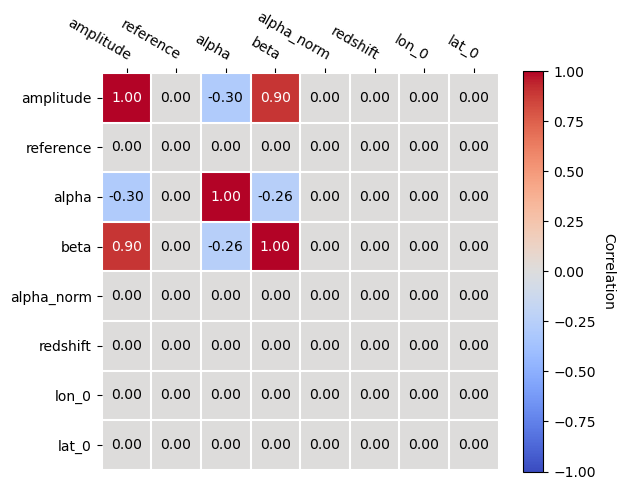

In [19]:
analysis.final_model.covariance.plot_correlation()

In [20]:
if len(analysis.final_model.parameters)> 3:
    nrow = int(np.sqrt(len(analysis.final_model.parameters)))
    ncol = int(np.ceil(len(analysis.final_model.parameters)/nrow))
else:
    ncol = len(analysis.final_model.parameters)
    nrow = 1
print(ncol, nrow)

4 2


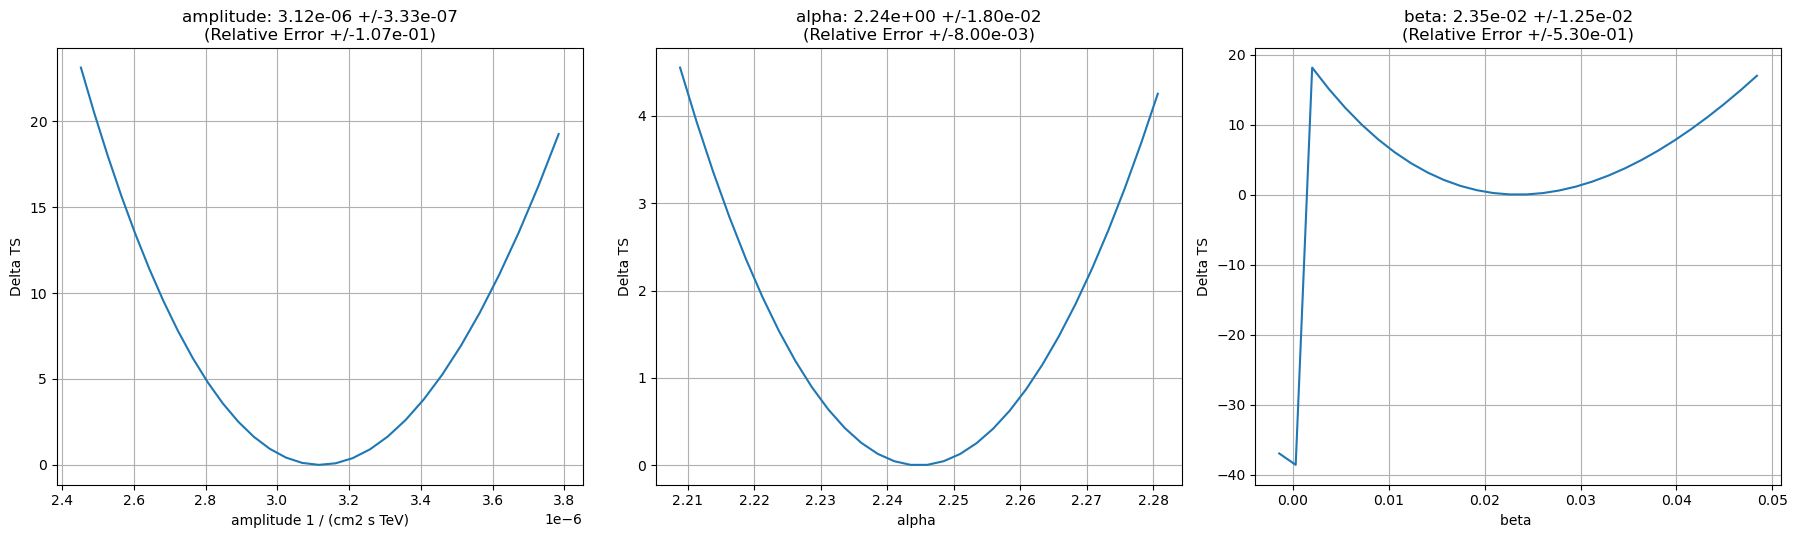

In [21]:
plt.figure(figsize=(ncol*6, nrow*5))
total_stat = analysis.fit_result.total_stat

for i, par in enumerate(analysis.final_model.parameters.free_parameters):
    par.scan_n_values = 30
    
    idx = analysis.final_model.parameters.index(par)
    name = analysis.final_model.parameters_unique_names[idx]
    
    profile = analysis.fit.stat_profile(datasets=analysis.datasets, parameter=par)
    
    plt.subplot(nrow, ncol, i+1)
    plt.plot(profile[f"{name}_scan"], profile["stat_scan"] - total_stat)
    
    plt.xlabel(f"{par.name} {par.unit}")
    plt.ylabel("Delta TS")
    plt.grid()
    if par.value != 0:
        plt.title(f"{par.name}: {par.value:.2e} +/-{par.error:.2e}\n(Relative Error +/-{par.error/par.value:.2e})")
    else:
        plt.title(f"{par.name}: {par.value:.2e} +/-{par.error:.2e}")
plt.tight_layout()

In [22]:
for fp in analysis.flux_points:
    print(fp)

FluxPoints
----------

  geom                   : RegionGeom
  axes                   : ['lon', 'lat', 'energy']
  shape                  : (1, 1, 21)
  quantities             : ['norm', 'norm_err', 'norm_errn', 'norm_errp', 'norm_ul', 'ts', 'npred', 'npred_excess', 'stat', 'counts', 'success', 'stat_scan']
  ref. model             : compound
  n_sigma                : 1
  n_sigma_ul             : 2
  sqrt_ts_threshold_ul   : 2
  sed type init          : likelihood

FluxPoints
----------

  geom                   : RegionGeom
  axes                   : ['lon', 'lat', 'energy']
  shape                  : (1, 1, 15)
  quantities             : ['norm', 'norm_err', 'norm_errn', 'norm_errp', 'norm_ul', 'ts', 'npred', 'npred_excess', 'stat', 'counts', 'success', 'stat_scan']
  ref. model             : compound
  n_sigma                : 1
  n_sigma_ul             : 2
  sqrt_ts_threshold_ul   : 2
  sed type init          : likelihood



In [23]:
analysis.flux_points[0].to_table(formatted=True, sed_type="e2dnde")

e_ref,e_min,e_max,e2dnde,e2dnde_err,e2dnde_errp,e2dnde_errn,e2dnde_ul,ts,sqrt_ts,npred,npred_excess,stat,is_ul,counts,success,norm_scan,stat_scan
MeV,MeV,MeV,MeV2 / (cm2 s TeV),MeV2 / (cm2 s TeV),MeV2 / (cm2 s TeV),MeV2 / (cm2 s TeV),MeV2 / (cm2 s TeV),,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[1],float32[1],float64,bool,float64[1],bool,float64[11],float64[11]
189.531,150.356,238.912,1.473e+02,1.562e+01,1.618e+01,1.507e+01,1.808e+02,8752.380,93.554,88.99653653431159,88.996544,10934.722,False,171.0,True,0.200 .. 5.000,11091.326 .. 11301.555
301.159,238.912,379.624,1.124e+02,1.427e+01,1.488e+01,1.367e+01,1.433e+02,6109.374,78.162,62.0101561627067,62.010155,8051.525,False,123.0,True,0.200 .. 5.000,8138.543 .. 8422.035
478.532,379.624,603.211,1.051e+02,1.603e+01,1.685e+01,1.522e+01,1.405e+02,4083.294,63.901,43.00856751326193,43.008568,5702.693,False,85.0,True,0.200 .. 5.000,5762.423 .. 5963.502
760.374,603.211,958.485,1.194e+02,2.019e+01,2.135e+01,1.907e+01,1.645e+02,3343.253,57.821,34.9788718367822,34.97887,3909.890,False,63.0,True,0.200 .. 5.000,3969.323 .. 4063.866
1208.213,958.485,1523.005,9.820e+01,2.197e+01,2.365e+01,2.038e+01,1.491e+02,1880.295,43.362,19.97673045435155,19.97673,3415.651,False,46.0,True,0.200 .. 5.000,3445.862 .. 3522.681
1919.815,1523.005,2420.012,1.256e+02,3.045e+01,3.297e+01,2.804e+01,1.967e+02,1628.772,40.358,16.999491411084104,16.99949,1249.459,False,25.0,True,0.200 .. 5.000,1284.374 .. 1300.286
3050.531,2420.012,3845.329,9.321e+01,3.296e+01,3.699e+01,2.922e+01,1.757e+02,758.674,27.544,7.991706466377522,7.9917064,738.006,False,13.0,True,0.200 .. 5.000,751.788 .. 772.293
4847.207,3845.329,6110.118,1.691e+02,5.637e+01,6.280e+01,5.029e+01,3.082e+02,791.738,28.138,8.999796121505561,8.999796,589.813,False,12.0,True,0.200 .. 5.000,616.256 .. 598.452


In [24]:
analysis.flux_points[1].to_table(formatted=True, sed_type="e2dnde")

e_ref,e_min,e_max,e2dnde,e2dnde_err,e2dnde_errp,e2dnde_errn,e2dnde_ul,ts,sqrt_ts,npred,npred_excess,stat,is_ul,counts,success,norm_scan,stat_scan
TeV,TeV,TeV,TeV / (cm2 s),TeV / (cm2 s),TeV / (cm2 s),TeV / (cm2 s),TeV / (cm2 s),,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[1],float32[1],float64,bool,float64[1],bool,float64[11],float64[11]
0.013,0.010,0.016,1.640e-11,1.640e-11,2.227e-11,1.323e-11,7.389e-11,1.386,1.177,0.9999148854582613,0.9999149,0.000,True,1.0,True,0.200 .. 5.000,0.080 .. 29.323
0.020,0.016,0.025,2.372e-11,3.556e-11,3.557e-11,nan,9.486e-11,0.444,0.667,39028.0301407937,186.06013,0.000,True,39028.0,True,0.200 .. 5.000,0.135 .. 46.202
0.032,0.025,0.040,3.634e-11,1.728e-11,1.714e-11,1.714e-11,7.051e-11,4.468,2.114,494976.06041013467,2107.108,0.000,False,494973.0,True,0.200 .. 5.000,2.502 .. 125.248
0.050,0.040,0.063,3.679e-11,8.256e-12,8.282e-12,8.282e-12,5.333e-11,19.710,4.440,569191.7141769747,4730.414,0.000,False,569190.0,True,0.200 .. 5.000,12.415 .. 340.875
0.079,0.063,0.100,3.805e-11,5.875e-12,5.877e-12,5.877e-12,4.980e-11,41.910,6.474,363384.0269301737,5498.053,0.000,False,363384.0,True,0.200 .. 5.000,29.743 .. 361.921
0.126,0.100,0.158,2.415e-11,3.467e-12,3.466e-12,3.466e-12,3.108e-11,48.541,6.967,141719.00439423666,3685.0088,0.000,False,141719.0,True,0.200 .. 5.000,32.989 .. 557.225
0.200,0.158,0.251,1.131e-11,1.677e-12,1.676e-12,1.676e-12,1.467e-11,45.546,6.749,39120.00033248068,1865.0006,0.000,False,39120.0,True,0.200 .. 5.000,29.157 .. 723.204
0.316,0.251,0.398,3.102e-12,7.363e-13,7.364e-13,7.362e-13,4.575e-12,17.753,4.213,9535.006760945325,573.0131,0.000,False,9535.0,True,0.200 .. 5.000,10.320 .. 426.892


Text(0.5, 1.0, 'TS Profiles')

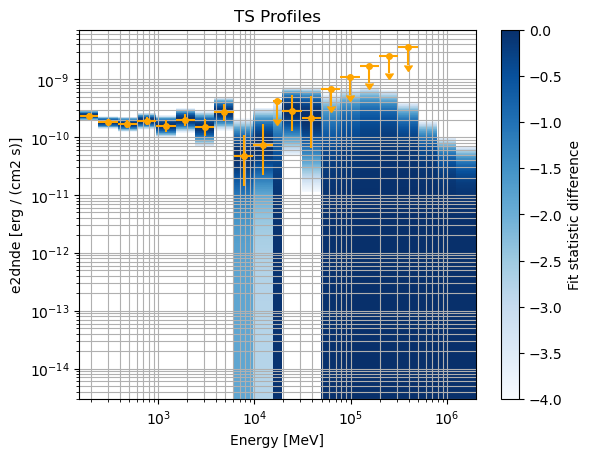

In [25]:
analysis.flux_points[0].plot_ts_profiles(sed_type="e2dnde")
analysis.flux_points[0].plot(sed_type="e2dnde", color="orange")

plt.grid(which='both')
plt.title('TS Profiles')

Text(0.5, 1.0, 'TS Profiles')

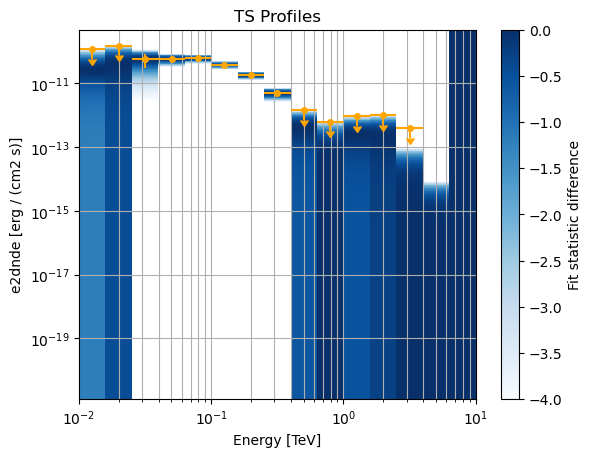

In [26]:
analysis.flux_points[1].plot_ts_profiles(sed_type="e2dnde")
analysis.flux_points[1].plot(sed_type="e2dnde", color="orange")

plt.grid(which='both')
plt.title('TS Profiles')

In [27]:
e_plot_min = 70 * u.MeV
e_plot_max = 70 * u.TeV

sed_kwargs = {
    "sed_type": "e2dnde",
    "energy_bounds": [e_plot_min, e_plot_max]
}
sed_plot_kwargs = {
    "sed_type": "e2dnde",
}

In [28]:
# Calculate & plot Crab reference flux
# https://doi.org/10.1016/j.jheap.2015.01.002
crab = create_crab_spectral_model("magic_lp")
crab.amplitude.error = 0.03e-11 * u.Unit("cm-2 s-1 TeV-1")
crab.alpha.error = 0.01
crab.beta.error = 0.01/np.log(10)

#flux_crab, flux_crab_error = crab.integral_error(e_lc_min, e_lc_max)
#print(flux_crab, flux_crab_error)

(1e-15, 1e-08)

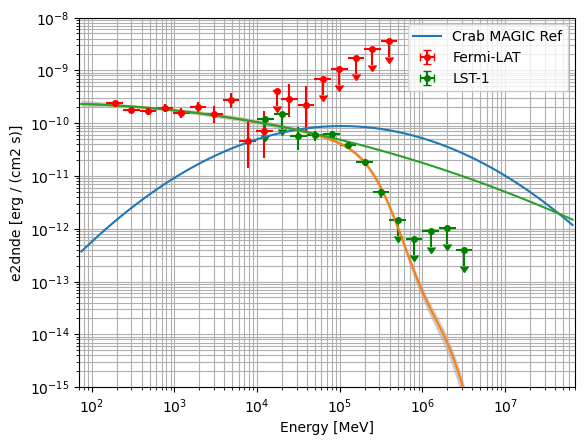

In [29]:
analysis.flux_points[0].plot(sed_type="e2dnde", color="red", label="Fermi-LAT")
analysis.flux_points[1].plot(sed_type="e2dnde", color="green", label="LST-1")

create_crab_spectral_model("magic_lp").plot(
    **sed_kwargs, label="Crab MAGIC Ref"
)
analysis.final_model[0].spectral_model.plot(**sed_kwargs)
analysis.final_model[0].spectral_model.model1.plot(**sed_kwargs)
analysis.final_model[0].spectral_model.plot_error(**sed_kwargs)

plt.grid(which="both")
plt.legend()
plt.xlim(e_plot_min, e_plot_max)
plt.ylim(1e-15, 1e-8)